In [2]:
import os
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [11]:
dataCSV = os.path.join(os.getcwd(), "..", "CSGODemo", "Dataset", "RWS-CSGO-Dataset.csv")
modelSaveFolder = os.path.join(os.getcwd(), "modelSave")

df = pd.read_csv(dataCSV)

print(df.columns.tolist())

invalidRows = (df == -1).any(axis=1)
pd.set_option('display.max_columns', None)

print(f"Invalid rows --> {invalidRows}")

print(df.describe())

['Player_Kills', 'Player_Assists', 'Player_Deaths', 'Player_HeadshotsPerc', 'Player_KR_Ratio', 'Player_KD_Ratio', 'Player_KAST', 'Player_EntryKills', 'Player_RWS', 'Player_Rating', 'Player_Rating2', 'Player_ATD', 'Player_ADR', 'Player_ELO', 'Player_matchWinPerc', 'Player_RoundWinPerc', 'Team_Player1_ELO', 'Team_Player2_ELO', 'Team_Player3_ELO', 'Team_Player4_ELO', 'Team_Average_ELO', 'Enemy_Player1_ELO', 'Enemy_Player2_ELO', 'Enemy_Player3_ELO', 'Enemy_Player4_ELO', 'Enemy_Player5_ELO', 'Enemy_Average_ELO', 'Map', 'RWS_Target']
Invalid rows --> 0        False
1        False
2        False
3        False
4        False
         ...  
45952    False
45953    False
45954    False
45955    False
45956    False
Length: 45957, dtype: bool
       Player_Kills  Player_Assists  Player_Deaths  Player_HeadshotsPerc  \
count  45957.000000    45957.000000   45957.000000          45957.000000   
mean      19.638600        4.428477      19.964573             41.161174   
std        3.284022        0.

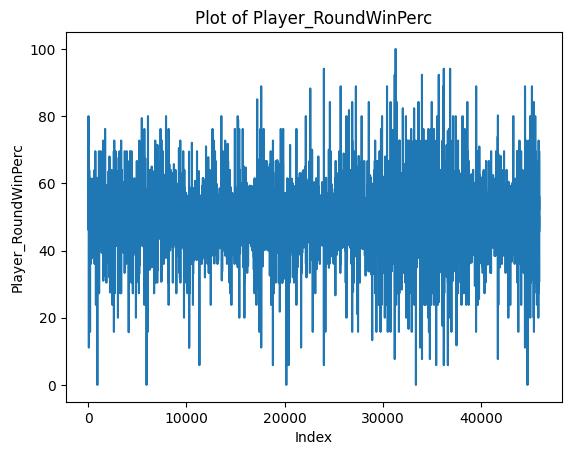

In [15]:
column_name = "Player_RoundWinPerc"

df[column_name].plot()

plt.title(f"Plot of {column_name}")
plt.xlabel("Index")
plt.ylabel(column_name)
plt.show()